In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import struct

In [2]:
from roi2json import roi_from_fpath

In [32]:
roi_fpath = "../local-data/image_4_branches.roi"

In [33]:
with open(roi_fpath, 'rb') as fh:
    raw_file_bytes = fh.read()

type_code, top, left, bottom, right = struct.unpack(">Bxhhhh", raw_file_bytes[6:16])
x1, y1, x2, y2 = struct.unpack(">ffff", raw_file_bytes[18:34])
n_coordinates, = struct.unpack(">h", raw_file_bytes[16:18])

In [34]:
shape_roi_size, = struct.unpack(">i", raw_file_bytes[36:40])

In [35]:
mcoords = struct.unpack(">" + "f" * shape_roi_size, raw_file_bytes[64:64+4*shape_roi_size])

In [41]:
shape_roi_size

3633

In [37]:
import numpy as np
from dtoolbioimage import Image as dbiImage

In [38]:
!pip install --quiet dtoolbioimage

In [42]:
len(mcoords)//3

1211

In [59]:
rr, cc, zz = np.array(mcoords).astype(int).reshape((3, 1211), order='F')

In [60]:
rr

array([  0,   1,   1, ..., 576, 575, 575])

In [61]:
cc

array([838, 838, 840, ..., 628, 628, 627])

In [62]:
zz

array([233, 234, 234, ...,   1,   1,   4])

In [63]:
canvas = np.zeros((1000, 1000), dtype=np.uint8)

canvas[rr, cc] = 255

In [70]:
pathspec = [int(m) for m in mcoords]

In [85]:
i = 0
coords = []

In [81]:
def append(i, coords):
    coords.append((pathspec[i+1], pathspec[i+2]))
    return i + 3

def close(i, coords):
    return i + 1
    
op_lookup = {
    0: append,
    1: append,
    4: close
}

In [86]:
while i < len(pathspec):
    op = op_lookup[pathspec[i]]
    i = op(i, coords)

In [89]:
rr, cc = list(zip(*coords))

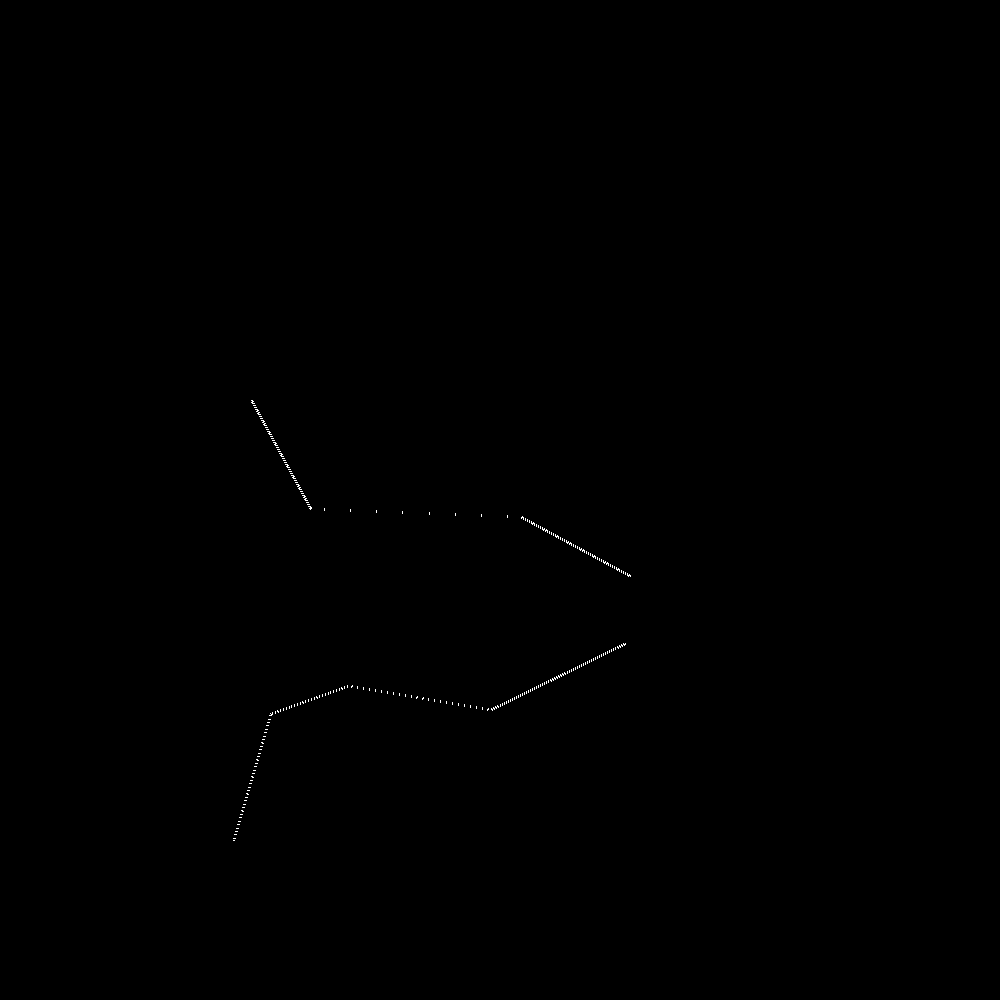

In [92]:
canvas = np.zeros((1000, 1000), dtype=np.uint8)
canvas[rr, cc] = 255
canvas.view(dbiImage)